In [1]:
import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# density

In [2]:
fn = r'C:\Users\Default\Documents\transect_densities.xlsx'
xl = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl.keys()

#for values in xl.keys():
#    print(xl[values])

dict_keys(['5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'])

In [3]:
for values in xl.keys():
    
    xl[values].loc['avg'] = xl[values].mean()
    xl[values].loc['stdv'] = xl[values].std()

    xl[values] = xl[values].T
    xl[values] = xl[values].resample('10D').mean()

    xl[values].reset_index(inplace=True)
    xl[values]['day'] = xl[values]['index'].dt.day
    xl[values]['month'] = xl[values]['index'].dt.month
    xl[values]['year'] = xl[values]['index'].dt.year

    xl[values] = xl[values].sort_values(by="index")
    xl[values].set_index('index', inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 5][cols]
    xl[values].dropna(inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 6][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 7][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 8][cols]
    xl[values].dropna(inplace=True)

    #print(xl[values])

# depth

In [7]:
fn = r'C:\Users\Default\Documents\transect_depths.xlsx'
xl2 = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl2.keys()

#for values in xl2.keys():
#    print(xl2[values])
    

dict_keys(['5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31'])

In [8]:
for values in xl2.keys():
    
    xl2[values].loc['avg'] = xl2[values].mean()
    xl2[values].loc['std'] = xl2[values].std()

    xl2[values] = xl2[values].T
    xl2[values] = xl2[values].resample('10D').mean()

    xl2[values].reset_index(inplace=True)
    xl2[values]['day'] = xl2[values]['index'].dt.day
    xl2[values]['month'] = xl2[values]['index'].dt.month
    xl2[values]['year'] = xl2[values]['index'].dt.year

    xl2[values] = xl2[values].sort_values(by="index")
    xl2[values].set_index('index', inplace=True)

    #print(xl2[values]);

# change in depth & density

<AxesSubplot:label='7c487a94-d7c4-4cb6-87dd-be50c6b71573'>

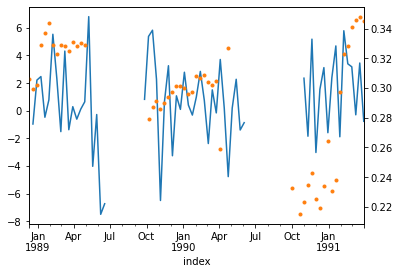

In [9]:
xl2['31'].avg.diff().plot()
xl['31'].avg.plot(style='.', secondary_y=True)

In [18]:
df = pd.DataFrame({'depth_diff':xl2['31'].avg.diff(), 'density':xl['31'].avg,'depth':xl2['31'].avg}, index=None, columns=None)
df.dropna(inplace=True)
df[df < 0] = 0
cols = ['depth_diff']
df[cols] = df[df[cols] != 0][cols]
df.dropna(inplace=True)
df

,depth_diff,density,depth
index,,,
1988-12-30,2.215686,0.302,28.215686
1989-01-09,2.470588,0.329,30.686275
1989-01-29,0.784314,0.344,31.000000
1989-02-08,5.529412,0.329,36.529412
1989-02-18,2.313725,0.323,38.843137
1989-03-10,4.313725,0.328,41.647059
1989-03-30,0.294118,0.331,40.568627
1989-04-19,0.117647,0.330,40.078431
1989-04-29,0.647059,0.329,40.725490


In [19]:
df2 = pd.DataFrame({'depth_diff':xl2['30'].avg.diff(), 'density':xl['30'].avg,'depth':xl2['30'].avg}, index=None, columns=None)
df2.dropna(inplace=True)
df2[df2 < 0] = 0
cols = ['depth_diff']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna(inplace=True)
df2

,depth_diff,density,depth
index,,,
1987-11-20,2.058824,0.3270,18.686275
1987-12-10,1.352941,0.2780,19.215686
1988-02-18,0.656863,0.3065,23.519608
1988-03-19,3.411765,0.3460,26.392157
1988-03-29,0.549020,0.3280,26.941176
1988-04-18,3.196078,0.3580,27.588235
1988-09-05,7.960784,0.2230,17.019608
1988-09-15,1.254902,0.2370,18.274510
1988-10-05,0.921569,0.3440,17.411765


In [20]:
df3 = pd.DataFrame({'depth_diff':xl2['26'].avg.diff(), 'density':xl['26'].avg,'depth':xl2['26'].avg}, index=None, columns=None)
df3.dropna(inplace=True)
df3[df3 < 0] = 0
cols = ['depth_diff']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna(inplace=True)
df3

,depth_diff,density,depth
index,,,
1983-09-18,2.450980,0.246,18.019608
1983-10-08,0.176471,0.336,17.529412
1983-10-18,0.372549,0.340,17.901961
1983-10-28,0.411765,0.346,18.313725
1983-11-07,3.058824,0.328,21.372549
1983-11-17,1.137255,0.320,22.509804
1983-11-27,0.627451,0.328,23.137255
1983-12-17,2.137255,0.324,24.823529
1983-12-27,0.764706,0.300,25.588235


In [21]:
df4 = pd.DataFrame({'depth_diff':xl2['18'].avg.diff(), 'density':xl['18'].avg,'depth':xl2['18'].avg}, index=None, columns=None)
df4.dropna(inplace=True)
df4[df4 < 0] = 0
cols = ['depth_diff']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna(inplace=True)
df4

,depth_diff,density,depth
index,,,


In [22]:
import scipy as sp
from scipy import stats

X = list(df.depth_diff) + list(df2.depth_diff) + list(df3.density)
Y = list(df.density) + list(df2.density) + list(df3.density) 

res = sp.stats.linregress(X, Y)
res

LinregressResult(slope=-0.008998076709561736, intercept=0.31505818763528437, rvalue=-0.39516468216157685, pvalue=4.319883769145482e-05, stderr=0.0021022544460959805)

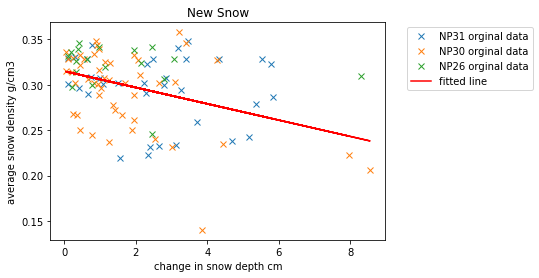

In [23]:
plt.plot(df.depth_diff,df.density, 'x', label='NP31 orginal data')
plt.plot(df2.depth_diff,df2.density, 'x', label='NP30 orginal data')
plt.plot(df3.depth_diff,df3.density, 'x', label='NP26 orginal data')

#line of best fit
Z = []
for point in X:
    Z.append(res.intercept + res.slope*point)

plt.plot(X, Z, 'r', label='fitted line')

plt.xlabel('change in snow depth cm')
plt.ylabel('average snow density g/cm3')
plt.title('New Snow')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

this graphs shows the density of new snow. Density and depth were measured on the same day. It is the change in depth over about 10 days and the density of the snow following positive changes in depth. The data shows a negative correlation between density and change in snow depth. As the snow depth increases you tend to get less dense snow. this makes sense as less dense snow compacts less 